# Predicting NVDA Stock Trends with LSTM: 7-Year Historical Analysis

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import yfinance as yf

We are gonna use the Python's yfinance library to get historic price data for NVIDIA **(NVDA)**. We are gonna be looking at the past 7 years.

In [13]:
ticker = yf.Ticker('NVDA')
news_data = ticker.history(period = "7y", interval = "1d").dropna()
news_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-27 00:00:00-04:00,6.768909,6.904574,6.737468,6.830305,505776000,0.00000,0.0
2018-08-28 00:00:00-04:00,6.824364,6.847140,6.672607,6.792675,475384000,0.00000,0.0
2018-08-29 00:00:00-04:00,6.784997,6.923214,6.764190,6.898196,420108000,0.00375,0.0
2018-08-30 00:00:00-04:00,6.866986,6.978203,6.844445,6.881352,346608000,0.00000,0.0
2018-08-31 00:00:00-04:00,6.861289,6.965323,6.851381,6.952443,306592000,0.00000,0.0
...,...,...,...,...,...,...,...
2025-08-19 00:00:00-04:00,182.429993,182.500000,175.490005,175.639999,185229200,0.00000,0.0
2025-08-20 00:00:00-04:00,175.169998,176.000000,168.800003,175.399994,215142700,0.00000,0.0
2025-08-21 00:00:00-04:00,174.850006,176.899994,173.809998,174.979996,140040900,0.00000,0.0


We are gonna plot two separate graphs

### High and Low Prices
- Good for volatility/intraday risk

In [62]:
dates = news_data.index.date
high_prices = news_data['High']
low_prices = news_data['Low']

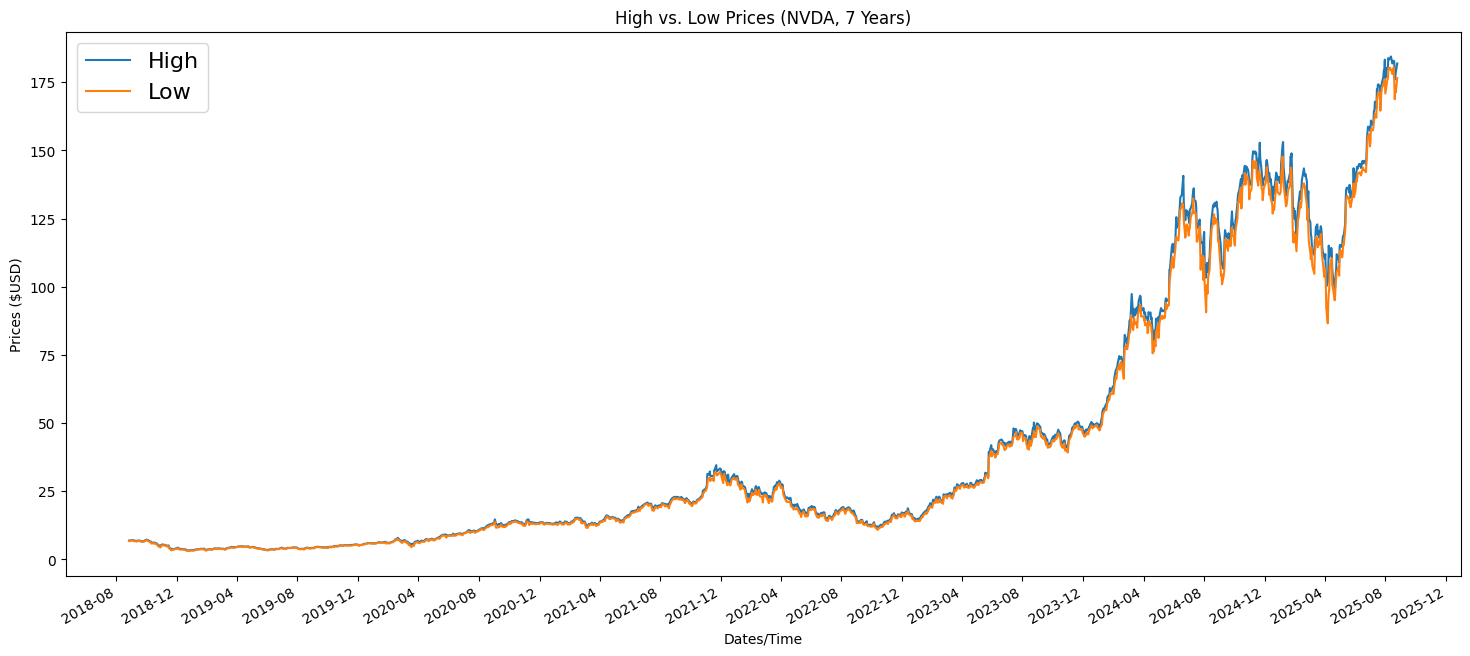

In [63]:
plt.figure(figsize = (18, 8)) 
plt.plot(dates, high_prices, label = 'High')
plt.plot(dates, low_prices, label = 'Low')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('High vs. Low Prices (NVDA, 7 Years)')
plt.xlabel('Dates/Time')
plt.ylabel('Prices ($USD)')
plt.legend(fontsize = 16)

plt.gcf().autofmt_xdate()
plt.show()

### Closing and Opening Prices
- Overnight sentiment 

In [64]:
dates = news_data.index.date
closing_prices = news_data['Close']
opening_prices = news_data['Open']

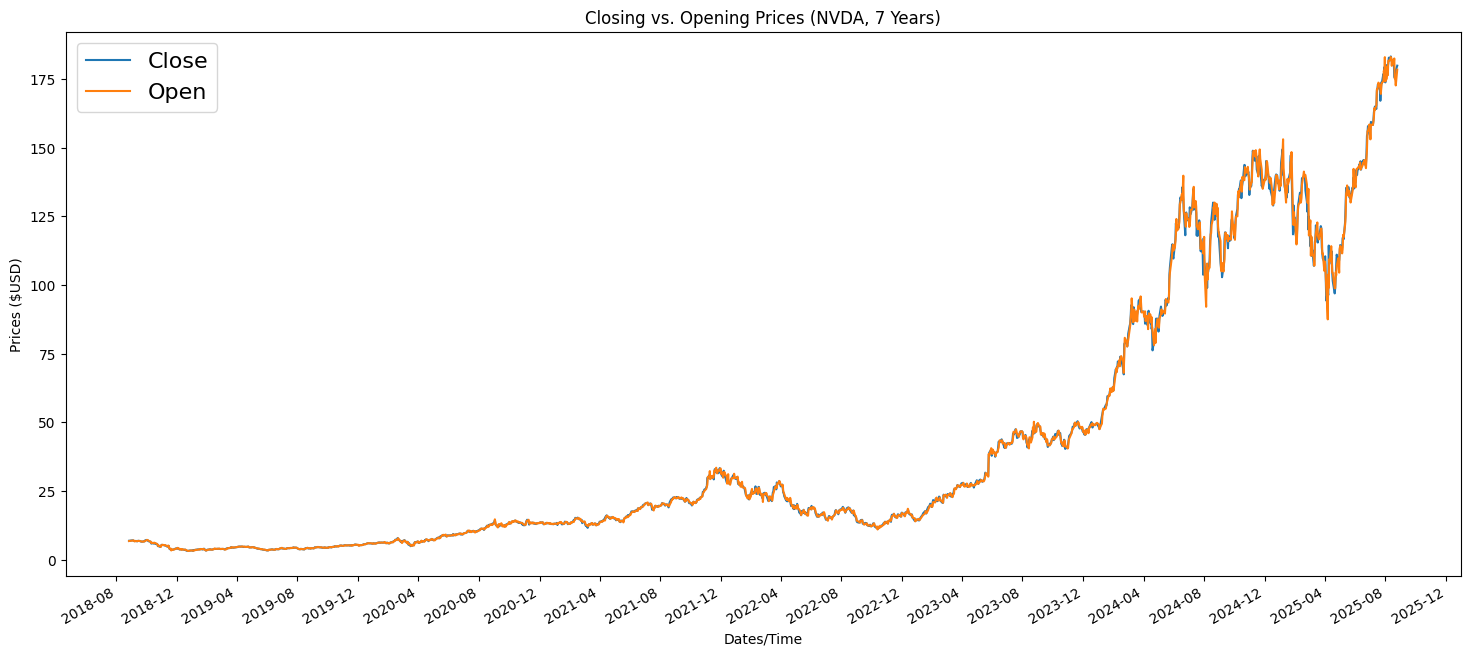

In [65]:
plt.figure(figsize = (18, 8)) 
plt.plot(dates, closing_prices, label = 'Close')
plt.plot(dates, opening_prices, label = 'Open')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Closing vs. Opening Prices (NVDA, 7 Years)')
plt.xlabel('Dates/Time')
plt.ylabel('Prices ($USD)')
plt.legend(fontsize = 16)

plt.gcf().autofmt_xdate()
plt.show()

### Data Preprocessing/Feature Engineering

In [73]:
closing_prices = news_data[['Close']] # in dataframe
opening_prices = news_data[['Open']] # in dataframe

In [ ]:
pipe = Pipeline(
    
)